In [102]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [103]:
df = pd.read_csv('/home/isaacp/research/repos/EvMatsim/contribs/ev/scenarios/utahev/bestoutput/ITERS/it.0/0.countscompare.txt', sep='\t')
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,12975,407,1,8,735,-0.989,0.989,37.719
1,12975,407,2,11,451,-0.976,0.976,28.950
2,12975,407,3,7,488,-0.986,0.986,30.574
3,12975,407,4,5,585,-0.991,0.991,33.769
4,12975,407,5,9,1278,-0.993,0.993,50.025


In [104]:
df['Link Id'].unique()

array([12975,  6086])

In [105]:
link = 12975
dflink = df[df['Link Id'] == link]
dflink.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,12975,407,1,8,735,-0.989,0.989,37.719
1,12975,407,2,11,451,-0.976,0.976,28.950
2,12975,407,3,7,488,-0.986,0.986,30.574
3,12975,407,4,5,585,-0.991,0.991,33.769
4,12975,407,5,9,1278,-0.993,0.993,50.025


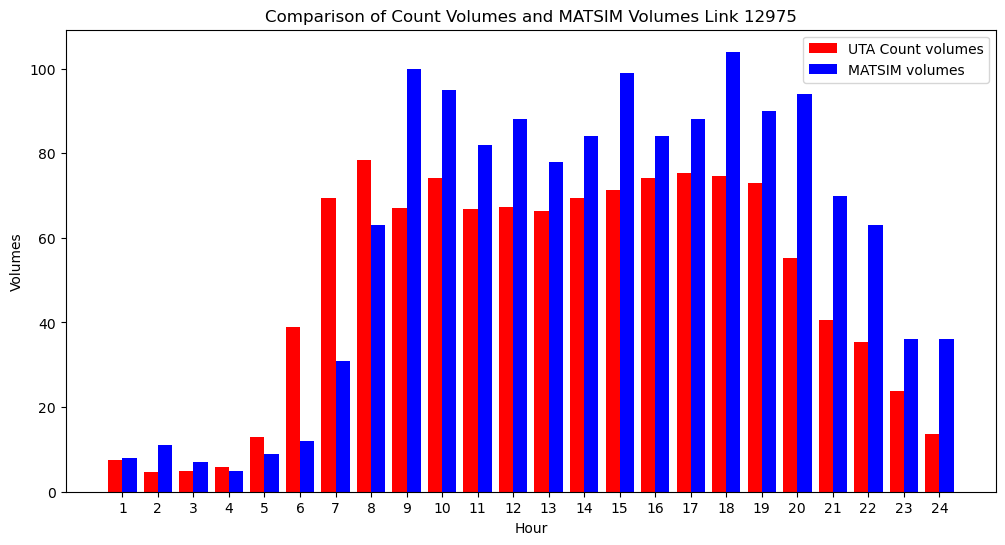

In [106]:
unique_hours = pd.unique(dflink['Hour'])
bar_width = 0.4  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Plot Count volumes histogram
plt.bar(r1, dflink['Count volumes'] / 99, color='red', width=bar_width, label='UTA Count volumes')

# Plot MATSIM volumes histogram
plt.bar(r2, dflink['MATSIM volumes'], color='blue', width=bar_width, label='MATSIM volumes')

# Labels, title, and legend
plt.xlabel('Hour')
plt.ylabel('Volumes')
plt.title(f'Comparison of Count Volumes and MATSIM Volumes Link {link}')
plt.xticks([r + bar_width / 2 for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.show()